# Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/superconductivity.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/superconductivity.parquet')

In [5]:
y_train = train.critical_temp
X_train = train.drop(columns=['critical_temp'])

In [6]:
y_validation = validation.critical_temp
X_validation = validation.drop(columns=['critical_temp'])

In [7]:
exploratory_depths =[2, 3, 4, 5]
exploratory_estimators = [25, 50, 100, 200, 300]
exploratory_learn_rate = [0.01, 0.05, 0.1, 0.5]

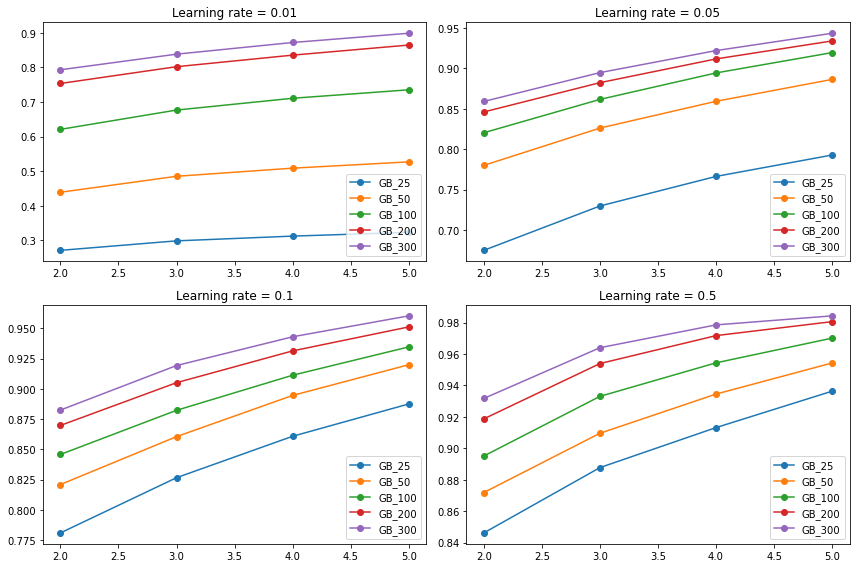

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [25]:
max_depth = [2, 3, 4]
n_estimators = [50, 75, 100, 150, 200, 250, 300, 350, 400]
learn_rate = [0.01, 0.05, 0.1, 0.2, 0.5]

In [26]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(GradientBoostingRegressor(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('GB_'+str(n)+'_'+str(d)+'_'+str(l))

In [50]:
metrics = regression(models_list, names_list, '../../../data/metrics/superconductivity/gradient_boosting.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
GB_50_2_0.01,10.289461,25.628634,25.993639,1.424207
GB_50_2_0.05,10.959652,16.054284,16.590860,3.342263
GB_50_2_0.1,10.477984,14.482424,15.063586,4.012884
GB_50_2_0.2,10.506885,13.362183,14.104418,5.554740
GB_50_2_0.5,10.599694,12.253008,13.016037,6.227280
...,...,...,...,...
GB_400_4_0.01,169.680895,11.496389,12.375507,7.646912
GB_400_4_0.05,172.975194,9.071987,10.751996,18.518653
GB_400_4_0.1,173.535487,7.547719,10.049477,33.145884
GB_400_4_0.2,173.842556,6.030809,9.748124,61.638740


In [72]:
metrics[metrics['delta%']<20].sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
GB_200_4_0.1,82.831593,8.961321,10.615057,18.454156
GB_400_4_0.05,172.975194,9.071987,10.751996,18.518653
GB_400_3_0.1,130.570229,9.183096,10.805600,17.668385
GB_200_3_0.2,62.030139,9.181421,10.813752,17.778627
GB_350_4_0.05,152.103486,9.294900,10.886378,17.122057
...,...,...,...,...
GB_75_3_0.01,22.615509,21.587263,22.041733,2.105268
GB_75_2_0.01,15.424789,22.992061,23.379067,1.683217
GB_50_4_0.01,19.895842,23.983906,24.453624,1.958475
GB_50_3_0.01,15.126560,24.551414,24.965846,1.688017


We continue with **GB_200_4_0.1** which despite having a delta of 18, it is a difference of only 2 degrees.

In [63]:
test = pd.read_parquet('../../../data/model_input/test_sets/superconductivity.parquet')

In [64]:
y_test = test.critical_temp
X_test = test.drop(columns=['critical_temp'])

In [65]:
retrain = pd.concat([train, validation])

In [66]:
y_retrain = retrain.critical_temp
X_retrain = retrain.drop(columns=['critical_temp'])

In [69]:
model = GradientBoostingRegressor(n_estimators=200, max_depth=4, learning_rate=0.1).fit(X_retrain, y_retrain)

In [70]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pre2)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 10.728


In [73]:
dump(model, 'best_gradient_boosting.joblib')

['best_gradient_boosting.joblib']

In [74]:
with open('../../../data/metrics/superconductivity/final_RMSE.txt', 'a') as f:
    f.write('\nGB, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_4320/3547223712.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


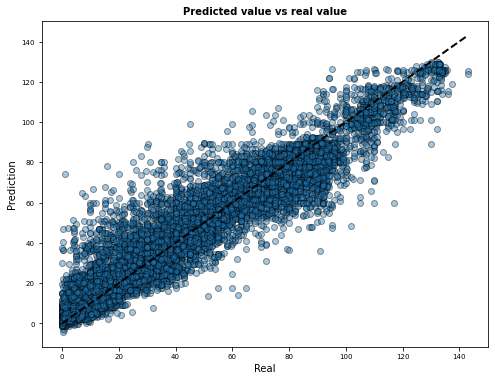

In [75]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)